In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM, SimpleRNN, GRU, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_label(x, i0, i1, i2):
    if x[i0] < 0 and x[i1] < 0 and x[i2] < 0:
        return 1
    elif x[i0] > 0 and x[i1] < 0 and x[i2] < 0:
        return 1
    elif x[i0] > 0 and x[i1] < 0 and x[i2] > 0:
        return 1
    elif x[i0] > 0 and x[i1] > 0 and x[i2] > 0:
        return 1
    else:
        return 0

T = 10
N = 5000
X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

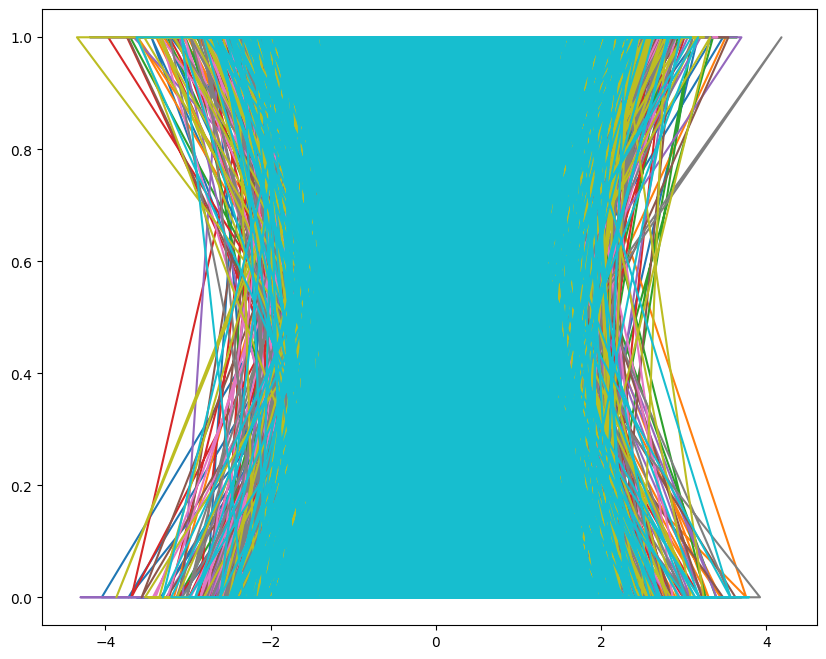

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X, Y)

# 1. ANN

In [ ]:
i = Input(shape=(T,))
x = Dense(1, activation="sigmoid")(i)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist = model.fit(X, Y,
          validation_split=0.5,
          epochs=100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5410 - loss: 0.7296 - val_accuracy: 0.7508 - val_loss: 0.5509
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7410 - loss: 0.5503 - val_accuracy: 0.7624 - val_loss: 0.5065
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7381 - loss: 0.5300 - val_accuracy: 0.7652 - val_loss: 0.4943
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7267 - loss: 0.5346 - val_accuracy: 0.7608 - val_loss: 0.4896
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7412 - loss: 0.5203 - val_accuracy: 0.7616 - val_loss: 0.4886
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7499 - loss: 0.5053 - val_accuracy: 0.7596 - val_loss: 0.4875
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7453 - loss: 0.5098 - val_accuracy: 0.7584 - val_loss: 0.4876
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7531 - loss: 0.5117 - val_accuracy: 0.7592 - 

## 1.1 Loss graph

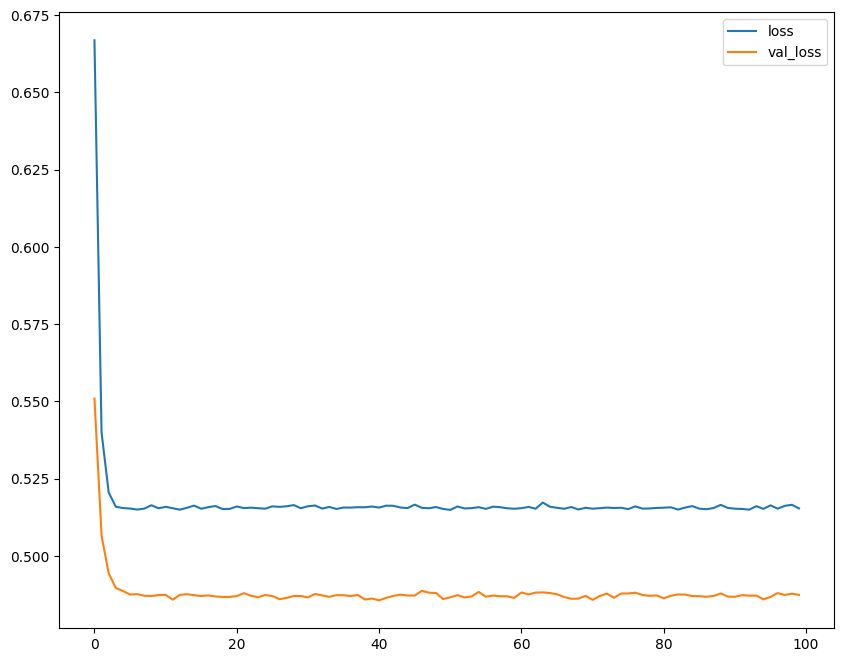

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()

## 1.2 Accuracy Graph

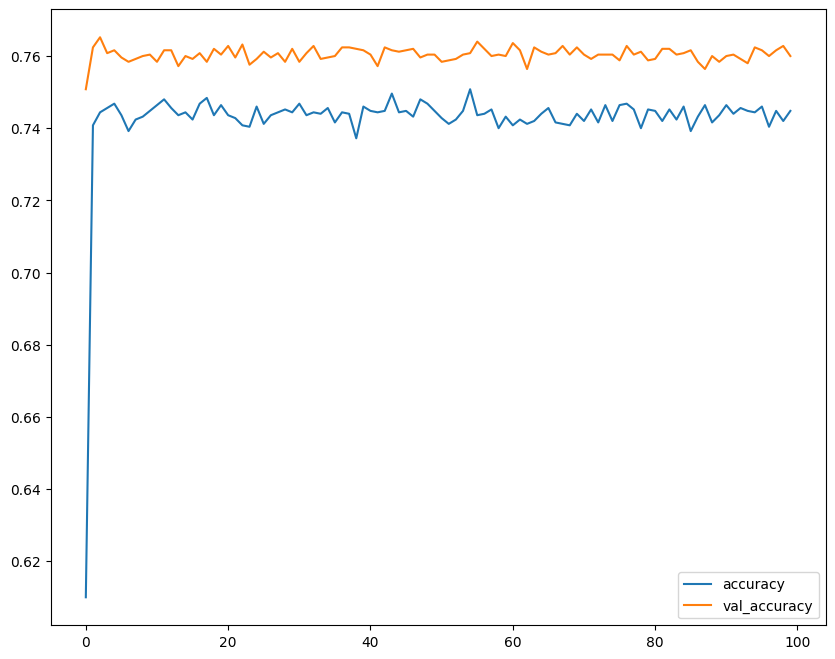

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.legend()

* Now we have excellent noisy graph and we see that our SimpleRNN model did not work well.

# 2. SimpleRNN

In [ ]:
N = 5000
T = 10
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X.shape: (5000, 10) 
Y.shape: (5000,)


* As we can see, our shape is N x T
* We need to add D end of the shape, so expanding the shape will work.!

In [ ]:
# X = np.expand_dims(X, -1) # Will work
X = X.reshape(N, T, -1) # Old school expanding dims method

i = Input(shape=(T, D)) # Takes an input N x T x D
x = SimpleRNN(10)(i)
x = Dense(1, activation="sigmoid")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6382 - loss: 0.6413 - val_accuracy: 0.7620 - val_loss: 0.4986
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7732 - loss: 0.4808 - val_accuracy: 0.7524 - val_loss: 0.5253
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7978 - loss: 0.4377 - val_accuracy: 0.8504 - val_loss: 0.3448
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8527 - loss: 0.3330 - val_accuracy: 0.8924 - val_loss: 0.2763
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8729 - loss: 0.3052 - val_accuracy: 0.8796 - val_loss: 0.3389
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8840 - loss: 0.2851 - val_accuracy: 0.9064 - val_loss: 0.2506
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8933 - loss: 0.2691 - val_accuracy: 0.9204 - val_loss: 0.2400
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8853 - loss: 0.2821 - val_accuracy: 0.8968 - 

## 2.1 Loss Graph

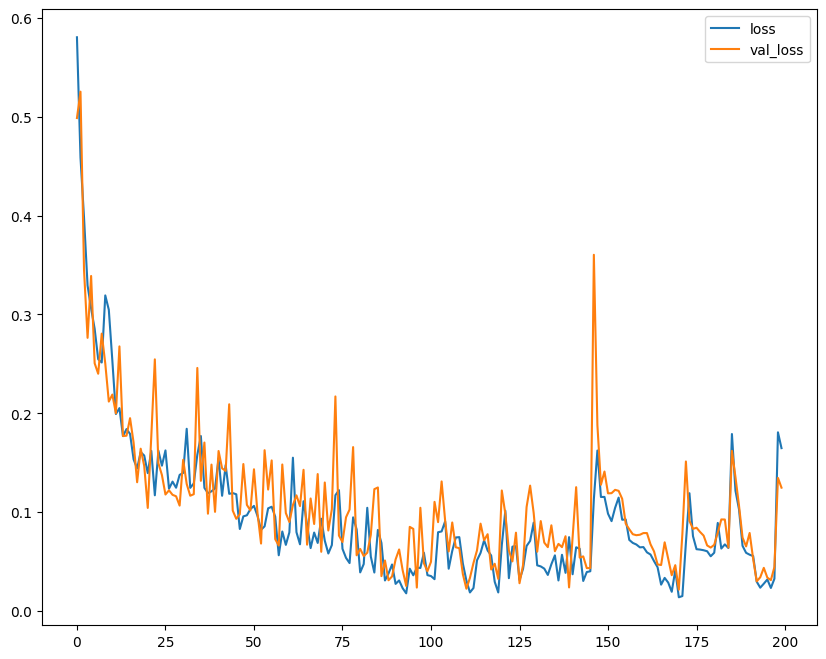

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 2.2 Accuracy Graph

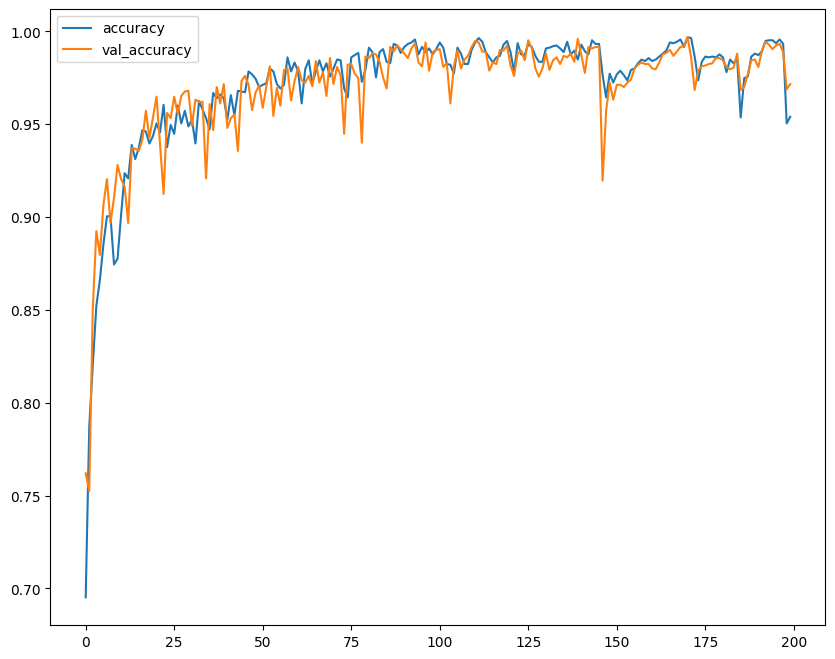

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

## 2.3 Change T in SimpleRNN

In [ ]:
N = 5000
T = 20
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)
X = X.reshape(N, T, -1)

X.shape: (5000, 20) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5559 - loss: 0.6903 - val_accuracy: 0.7472 - val_loss: 0.5713
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7314 - loss: 0.5787 - val_accuracy: 0.7504 - val_loss: 0.5650
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7301 - loss: 0.5838 - val_accuracy: 0.7544 - val_loss: 0.5617
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7394 - loss: 0.5782 - val_accuracy: 0.7548 - val_loss: 0.5575
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7305 - loss: 0.5815 - val_accuracy: 0.7528 - val_loss: 0.5575
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7344 - loss: 0.5781 - val_accuracy: 0.7540 - val_loss: 0.5560
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7295 - loss: 0.5823 - val_accuracy: 0.7540 - val_loss: 0.5567
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7365 - loss: 0.5751 - val_accuracy: 0.7560 - 

### 2.3.1 Loss Graph

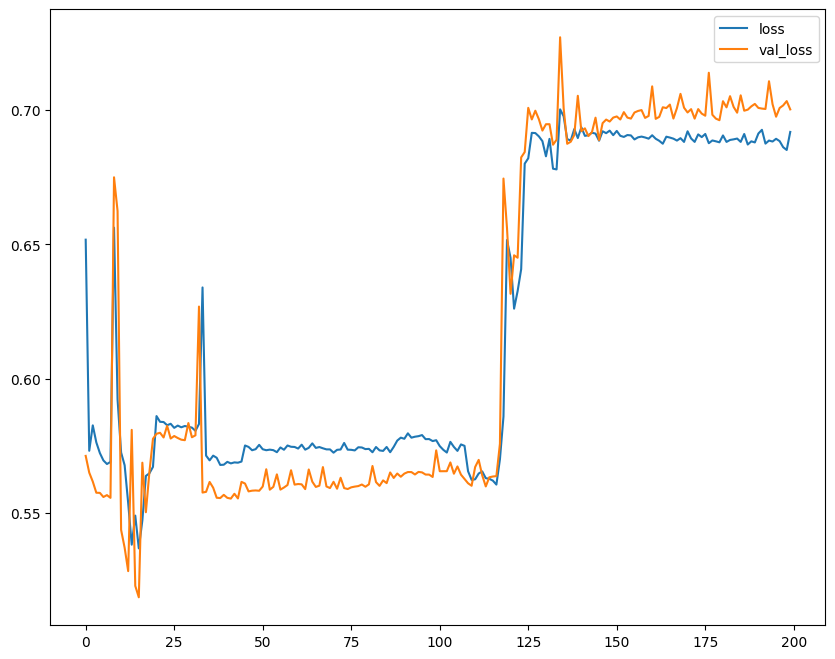

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 2.3.1 Accuracy Graph

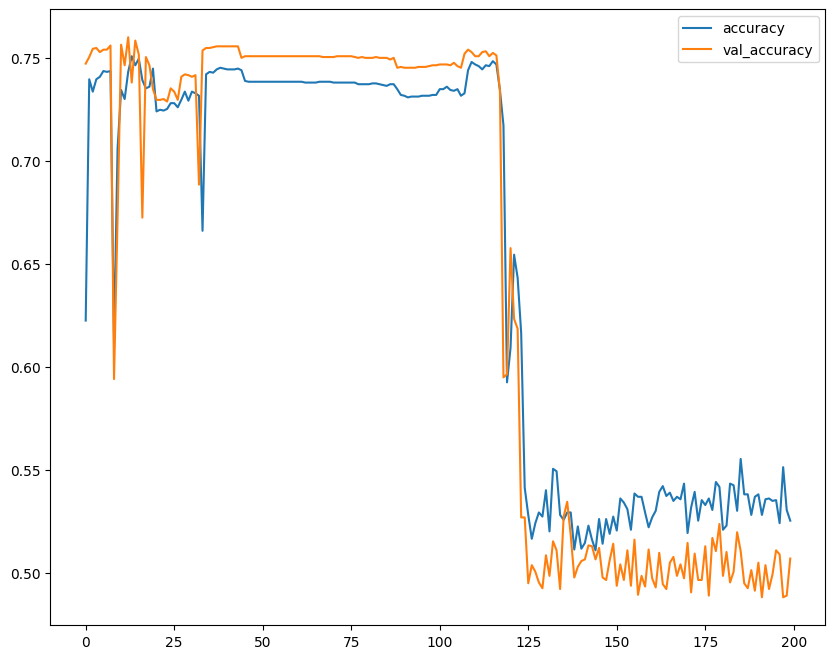

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

# 3. LSTM

In [ ]:
N = 5000
T = 10
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

X.shape: (5000, 10) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4825 - loss: 0.6939 - val_accuracy: 0.5124 - val_loss: 0.6925
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5174 - loss: 0.6907 - val_accuracy: 0.6504 - val_loss: 0.6374
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7214 - loss: 0.5618 - val_accuracy: 0.8180 - val_loss: 0.4159
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8130 - loss: 0.4207 - val_accuracy: 0.8840 - val_loss: 0.3120
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8766 - loss: 0.3005 - val_accuracy: 0.8892 - val_loss: 0.3026
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9040 - loss: 0.2559 - val_accuracy: 0.9328 - val_loss: 0.1956
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9335 - loss: 0.1904 - val_accuracy: 0.9152 - val_loss: 0.2110
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9304 - loss: 0.1871 - val_accuracy: 0.9516 - 

## 3.1 Loss Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

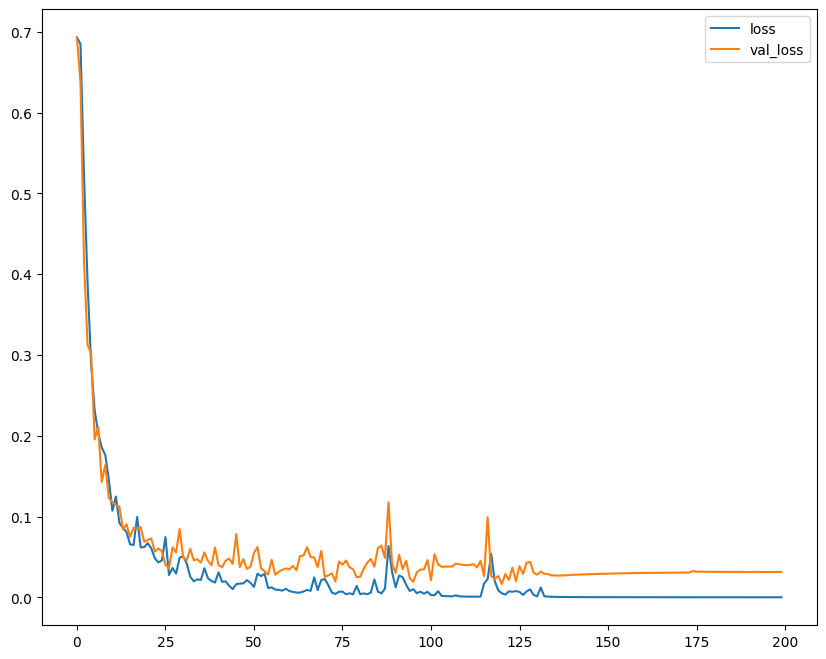

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 3.2 Accuracy Graph

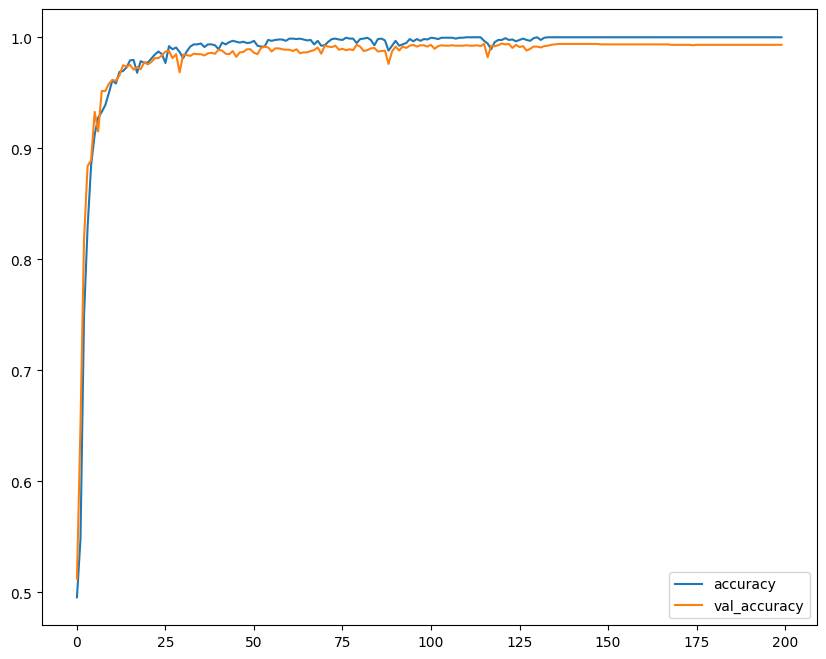

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

## 3.3 Change T to 20 with LSTM

In [ ]:
N = 5000
T = 20
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

X.shape: (5000, 20) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
          validation_split=0.5,
          epochs=400)

Epoch 1/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5181 - loss: 0.6929 - val_accuracy: 0.4984 - val_loss: 0.6939
Epoch 2/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4979 - loss: 0.6933 - val_accuracy: 0.4952 - val_loss: 0.6949
Epoch 3/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5270 - loss: 0.6917 - val_accuracy: 0.4996 - val_loss: 0.6950
Epoch 4/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5085 - loss: 0.6928 - val_accuracy: 0.4932 - val_loss: 0.6944
Epoch 5/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4988 - loss: 0.6930 - val_accuracy: 0.4980 - val_loss: 0.6953
Epoch 6/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5193 - loss: 0.6923 - val_accuracy: 0.5052 - val_loss: 0.6934
Epoch 7/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5098 - loss: 0.6923 - val_accuracy: 0.5028 - val_loss: 0.6935
Epoch 8/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5091 - loss: 0.6933 - val_accuracy: 0.

### 3.3.1 Loss graph

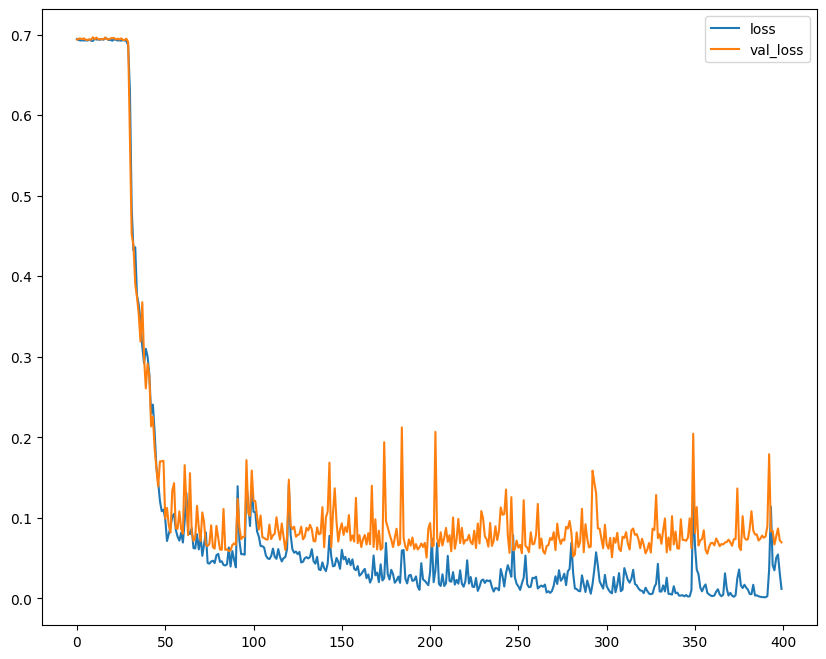

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 3.3.2 Accuracy Graph

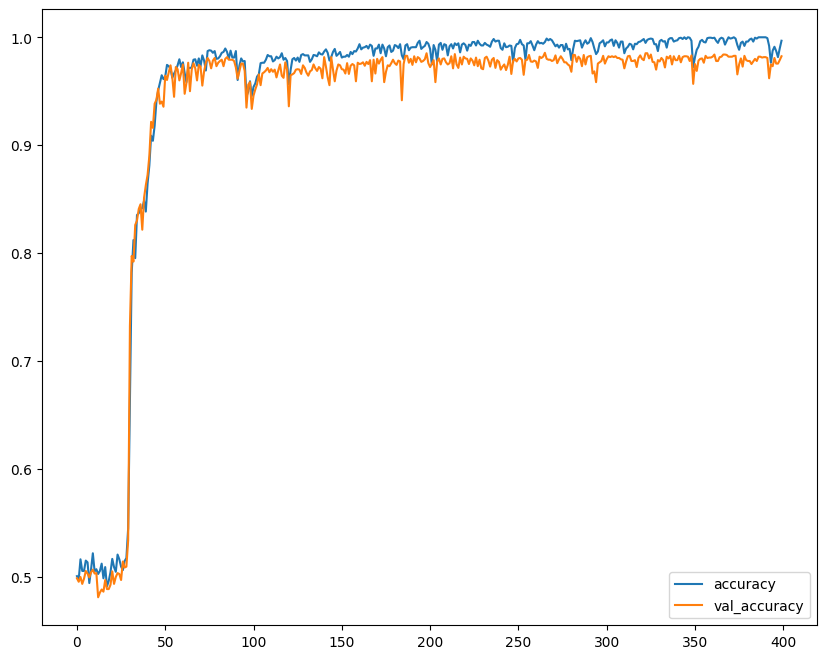

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

## 3.4 LSTM with GlobalMaxPooling Regularization Layer

In [ ]:
N = 5000
T = 30
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

X.shape: (5000, 10) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = LSTM(10, return_sequences=True)(i) # To be able to use GlobalMaxPooling we need sequences, that's why we used return_sequences parameter.
x = GlobalMaxPooling1D()(x) # GlobalMaxpooingLayer
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=100)

NameError: name 'GlobalMaxPooling1D' is not defined

### 3.4.1 Loss Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 3.4.2 Accuracy Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

# 4. GRU

In [ ]:
N = 5000
T = 10
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

X.shape: (5000, 10) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = GRU(10)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

## 4.1 Loss Graph

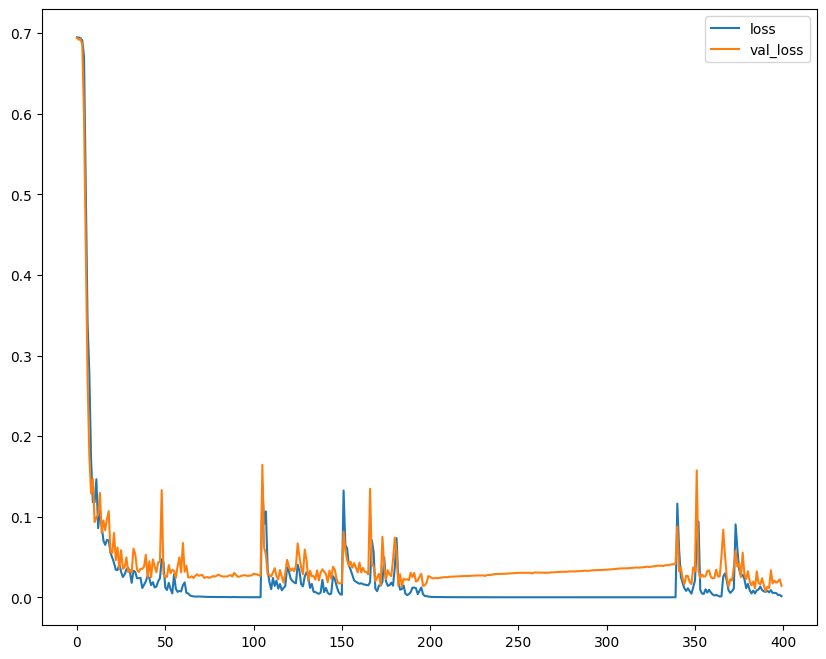

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 4.2 Accuracy Graph

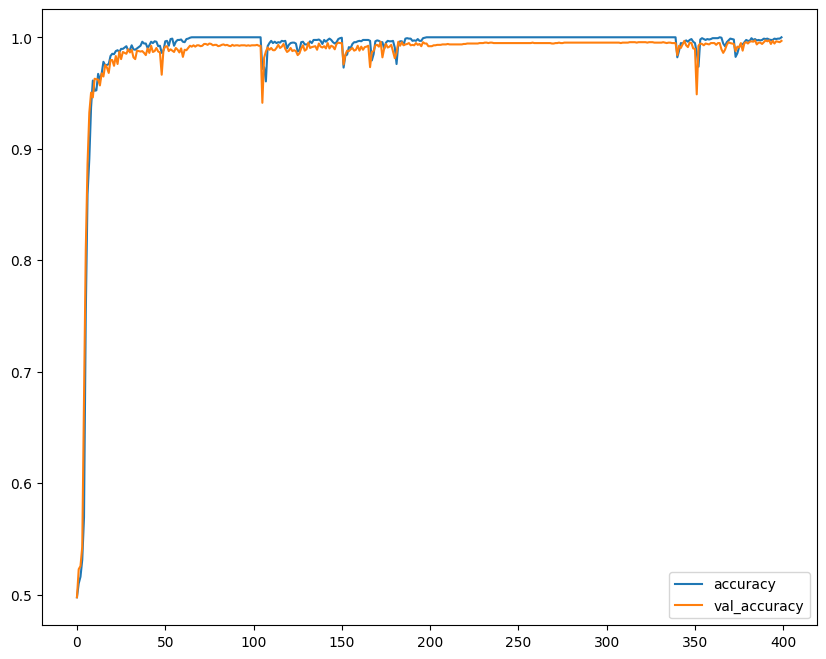

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

## 4.3 Change T to 20 with GRU

In [ ]:
N = 5000
T = 20
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

X.shape: (5000, 20) 
Y.shape: (5000,)


In [ ]:
i = Input(shape=(T, D))
x = GRU(10)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5183 - loss: 0.6940 - val_accuracy: 0.5040 - val_loss: 0.6959
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5257 - loss: 0.6916 - val_accuracy: 0.5100 - val_loss: 0.6937
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4885 - loss: 0.6943 - val_accuracy: 0.4976 - val_loss: 0.6943
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4983 - loss: 0.6949 - val_accuracy: 0.4896 - val_loss: 0.6945
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5176 - loss: 0.6931 - val_accuracy: 0.4876 - val_loss: 0.6935
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5106 - loss: 0.6938 - val_accuracy: 0.4936 - val_loss: 0.6936
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5421 - loss: 0.6923 - val_accuracy: 0.4996 - val_loss: 0.6936
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5083 - loss: 0.6939 - val_accuracy: 0.

### 4.3.1 Loss Graph

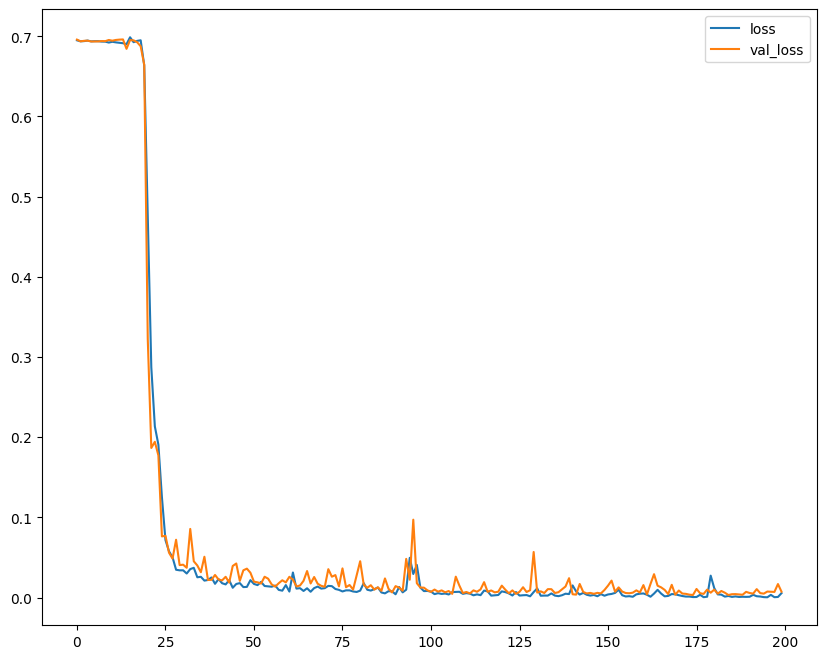

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 4.3.2 Accuracy Graph

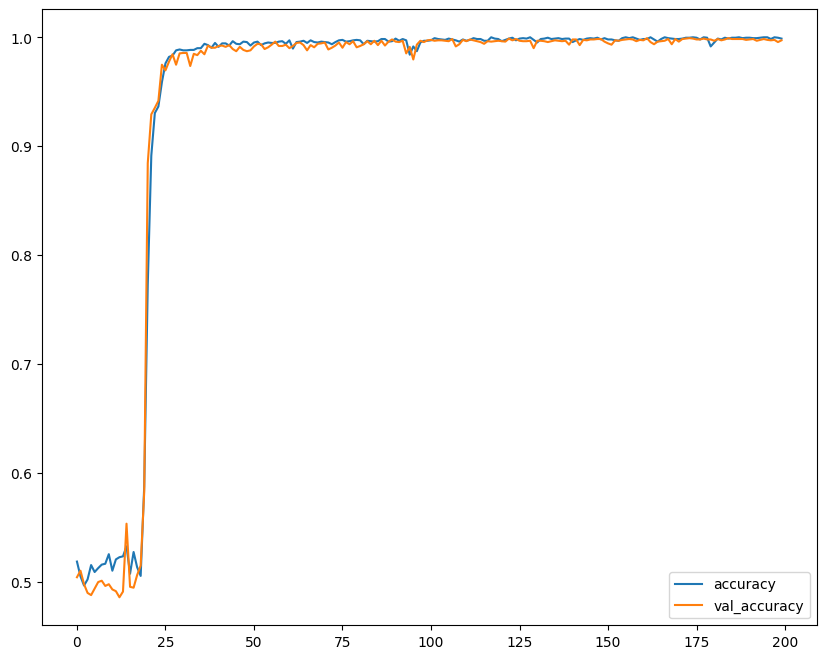

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### 4.4 GRU with GlobalMaxPooling Regularization Layer

In [ ]:
N = 5000
T = 30
D = 1

X = []
Y = []
for i in range(N):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    # y = get_label(x, -1, -2, -3) # last three points
    # y = get_label(x, -N // 2, -N//2 - 1, -N//2 - 2) # midle three points
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
print("X.shape:", X.shape, "\nY.shape:", Y.shape)

X = np.expand_dims(X, -1)

In [ ]:
i = Input(shape=(T, D))
x = GRU(10, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, Y,
                    validation_split=0.5,
                    epochs=200)

### 4.4.1 Loss Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 4.4.2 Accuracy Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()